In [1]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import QFT
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram
import numpy as np
pi = np.pi

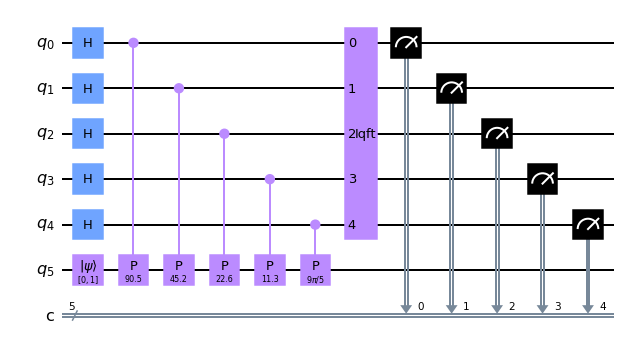

In [33]:
n=5
qc=QuantumCircuit(n+1,n)

for qubit in range(n):
    qc.h(qubit)

init_st=[0, 1]
qc.initialize(init_st,n)


theta=0.9
    
for x in range(n):
        exponent = 2**(n-x-1)
        qc.cp(2*pi*theta*exponent, x, n)

qc.append(QFT(n).inverse(), range(n))       

for i in range(n):
    qc.measure(i,i)

qc.draw('mpl')

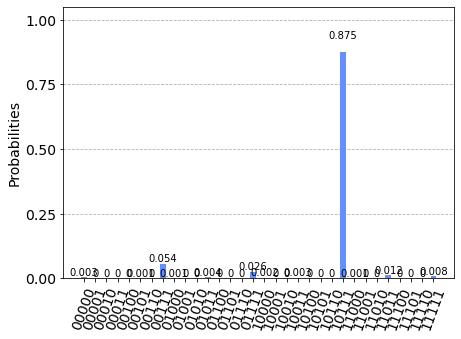

In [34]:
simulator = Aer.get_backend('qasm_simulator')
counts = execute(qc, backend=simulator, shots=10000).result().get_counts()
plot_histogram(counts)

In [35]:
import operator
highest_probability_outcome = max(counts.items(), key=operator.itemgetter(1))[0][::-1]
highest_probability_outcome

'11101'

In [37]:
measured_theta = int(highest_probability_outcome, 2)/2**n
print("Using ", n, " qubits with theta = ",theta, ", measured_theta = ", measured_theta)

Using  5  qubits with theta =  0.9 , measured_theta =  0.90625
